### Goals 
This notebook contains an analysis on data regarding social media usage and emotional well-being. The goal for this project was to do the following:

Get acquainted with the data
Clean the data so it is ready for analysis
Develop some questions for analysis
Analyze variables within the data to gain patterns and insights on these questions

### Data 
The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being

Information regarding the features for the data are located in the Column section on the website.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and exploring dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


In [6]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [9]:
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [10]:
df.duplicated().sum()

0

In [13]:
df_clean = df.dropna()
df_clean.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [14]:
df_clean.nunique()

User_ID                       1000
Age                             18
Gender                          18
Platform                         7
Daily_Usage_Time (minutes)      30
Posts_Per_Day                    8
Likes_Received_Per_Day          49
Comments_Received_Per_Day       30
Messages_Sent_Per_Day           29
Dominant_Emotion                 6
dtype: int64

In [16]:
df_clean.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


In [28]:
# Identify rows where the Age column contains non-numeric values (i.e., likely gender values)
non_numeric_ages = ['Male','Female','Non-binary']

# Filter out rows with non-numeric Age values
df_clean = df_clean[~df_clean.Age.isin(non_numeric_ages)]

# Verify the cleaning process by checking the unique values in the Age column
df_clean['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32'], dtype=object)

In [32]:
df_clean['Age'] = df_clean['Age'].astype(int)
df_clean['Age'].unique()

array([25, 30, 22, 28, 33, 21, 27, 24, 29, 31, 23, 26, 34, 35, 32])

## Formulating Questions
In this project, I will aim to explore and answer the following questions:
1. How does the distribution of dominant emotions vary across different age groups? Are younger users more prone to certain emotions compared to older users?
2. Which platform has the highest average daily usage time among users? Is there a significant difference in the emotional well-being of users across different platforms?
3. How do the number of posts, likes, comments, and messages sent per day differ between genders? Are there any notable trends in the dominant emotions experienced by different genders?

## EDA and Visualizations

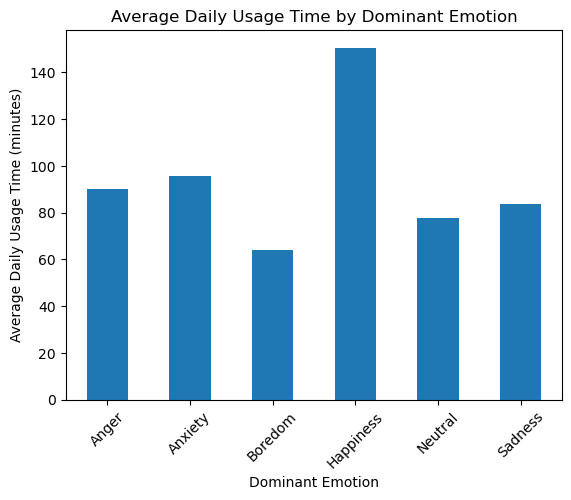

In [23]:
# Correlation between daily usage time and dominant emotion
df_clean.groupby('Dominant_Emotion')['Daily_Usage_Time (minutes)'].mean().plot(kind='bar')
plt.title('Average Daily Usage Time by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

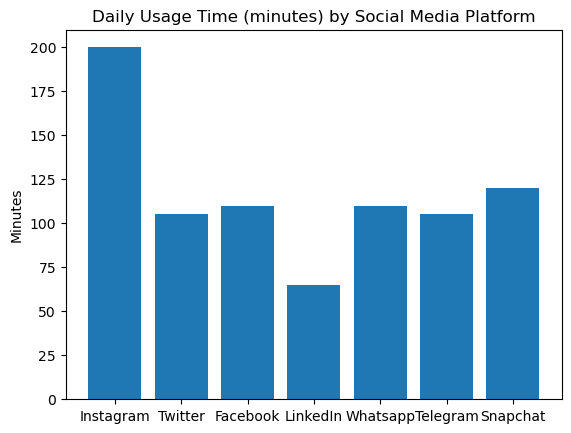

<Figure size 640x480 with 0 Axes>

In [19]:
# Daily usage time by social media platform
plt.bar(df_clean.Platform, df_clean['Daily_Usage_Time (minutes)'])
plt.title('Daily Usage Time (minutes) by Social Media Platform')
plt.ylabel('Minutes')
plt.show()
plt.clf()

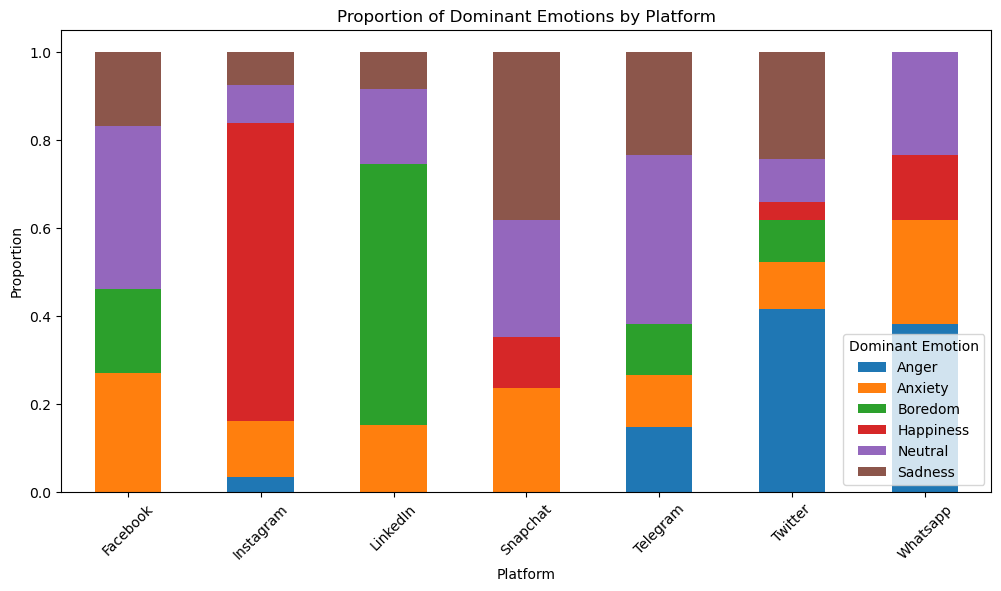

In [51]:
# Calculate the proportions of dominant emotions by platform
proportion_data_platform = df_clean.groupby(['Platform', 'Dominant_Emotion']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportional distribution of dominant emotions by platform
proportion_data_platform.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Dominant Emotions by Platform')
plt.xlabel('Platform')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Dominant Emotion')
plt.show()

In [53]:
# Analyzing by age group
age_bins = [20, 26, 31, 36]
age_labels = ['20-25', '26-30', '31-35']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels, right=False)

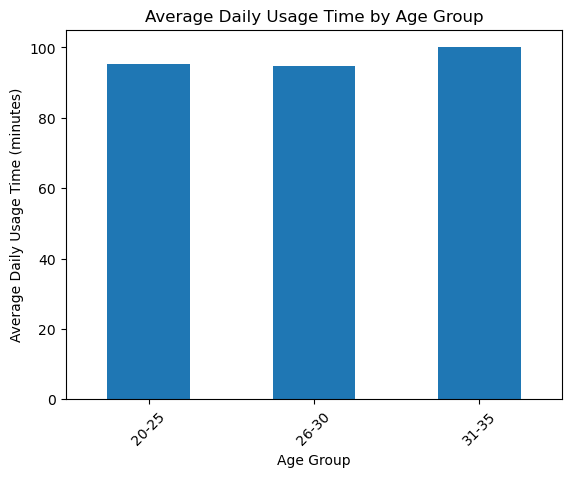

In [54]:
df_clean.groupby('Age_Group')['Daily_Usage_Time (minutes)'].mean().plot(kind='bar')
plt.title('Average Daily Usage Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.show()

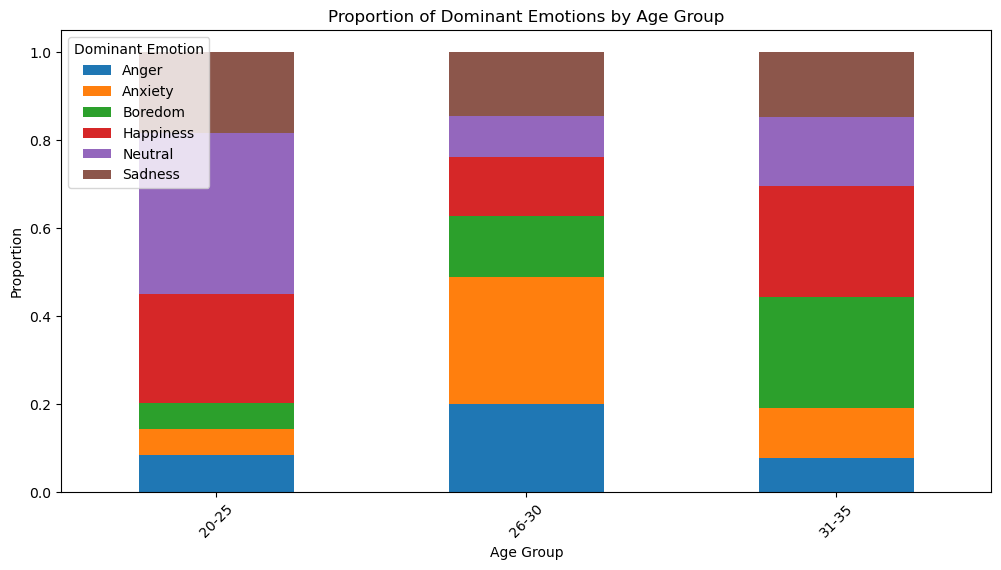

In [55]:
# Calculate the proportions of dominant emotions by age group
proportion_data_age = df_clean.groupby(['Age_Group', 'Dominant_Emotion']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportional distribution of dominant emotions by age group
proportion_data_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Dominant Emotions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Dominant Emotion')
plt.show()

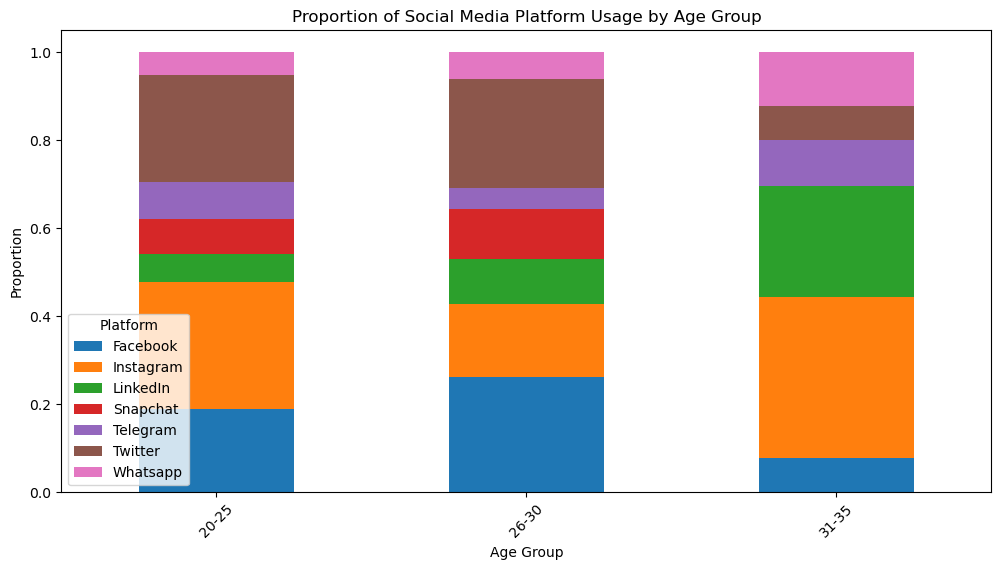

In [56]:
# Calculate the proportions of platform usage by age group
proportion_data_platform_age = df_clean.groupby(['Age_Group', 'Platform']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportional distribution of platform usage by age group
proportion_data_platform_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Social Media Platform Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.show()


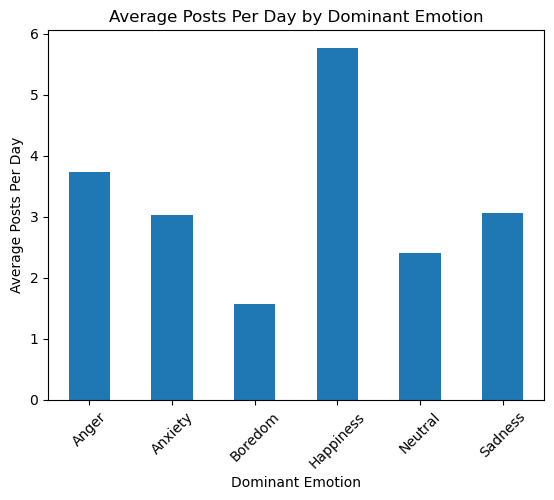

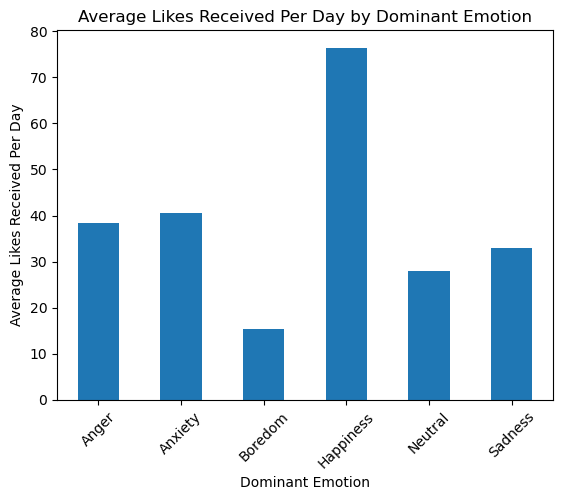

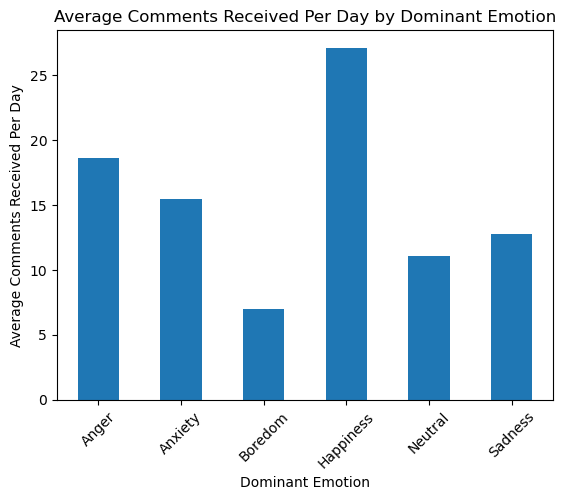

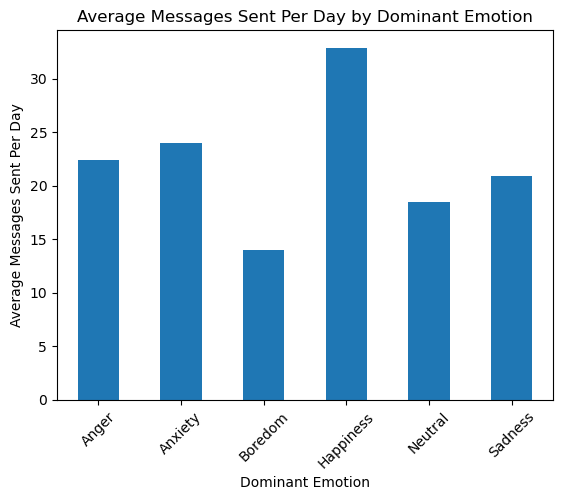

<Figure size 640x480 with 0 Axes>

In [37]:
# Engagement metrics and emotional well-being
df_clean.groupby('Dominant_Emotion')['Posts_Per_Day'].mean().plot(kind='bar')
plt.title('Average Posts Per Day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Posts Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

df_clean.groupby('Dominant_Emotion')['Likes_Received_Per_Day'].mean().plot(kind='bar')
plt.title('Average Likes Received Per Day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Likes Received Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

df_clean.groupby('Dominant_Emotion')['Comments_Received_Per_Day'].mean().plot(kind='bar')
plt.title('Average Comments Received Per Day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Comments Received Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

df_clean.groupby('Dominant_Emotion')['Messages_Sent_Per_Day'].mean().plot(kind='bar')
plt.title('Average Messages Sent Per Day by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Average Messages Sent Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [43]:
usage_bins = [0, 60, 120, float('inf')]
usage_labels = ['Low', 'Moderate', 'High']
df_clean['Usage_Category'] = pd.cut(df_clean['Daily_Usage_Time (minutes)'], bins=usage_bins, labels=usage_labels, right=False)

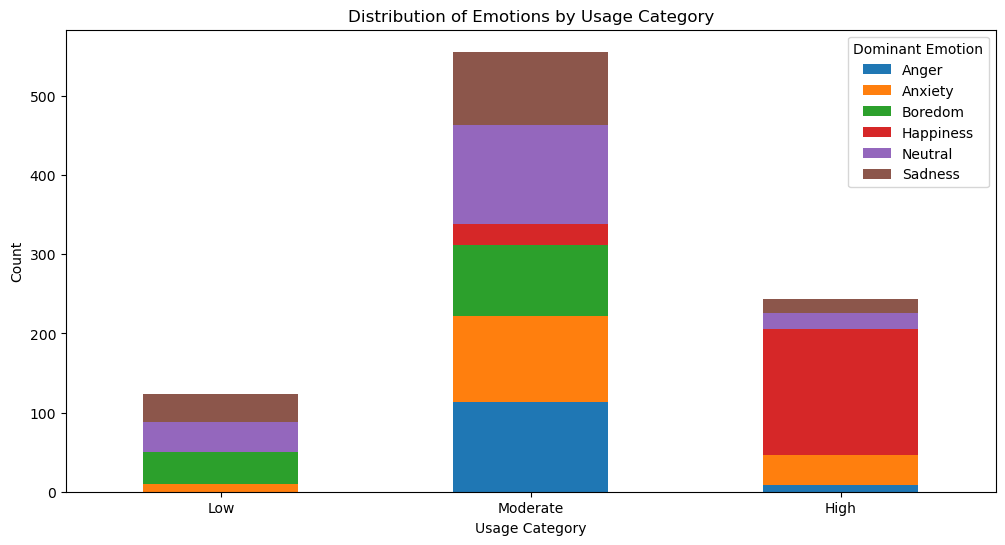

In [44]:
df_clean.groupby(['Usage_Category', 'Dominant_Emotion']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Emotions by Usage Category')
plt.xlabel('Usage Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Dominant Emotion')
plt.show()

/var/folders/bv/jvqmfz513fs55z3tkhh02tqw0000gn/T/ipykernel_54669/2235030316.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


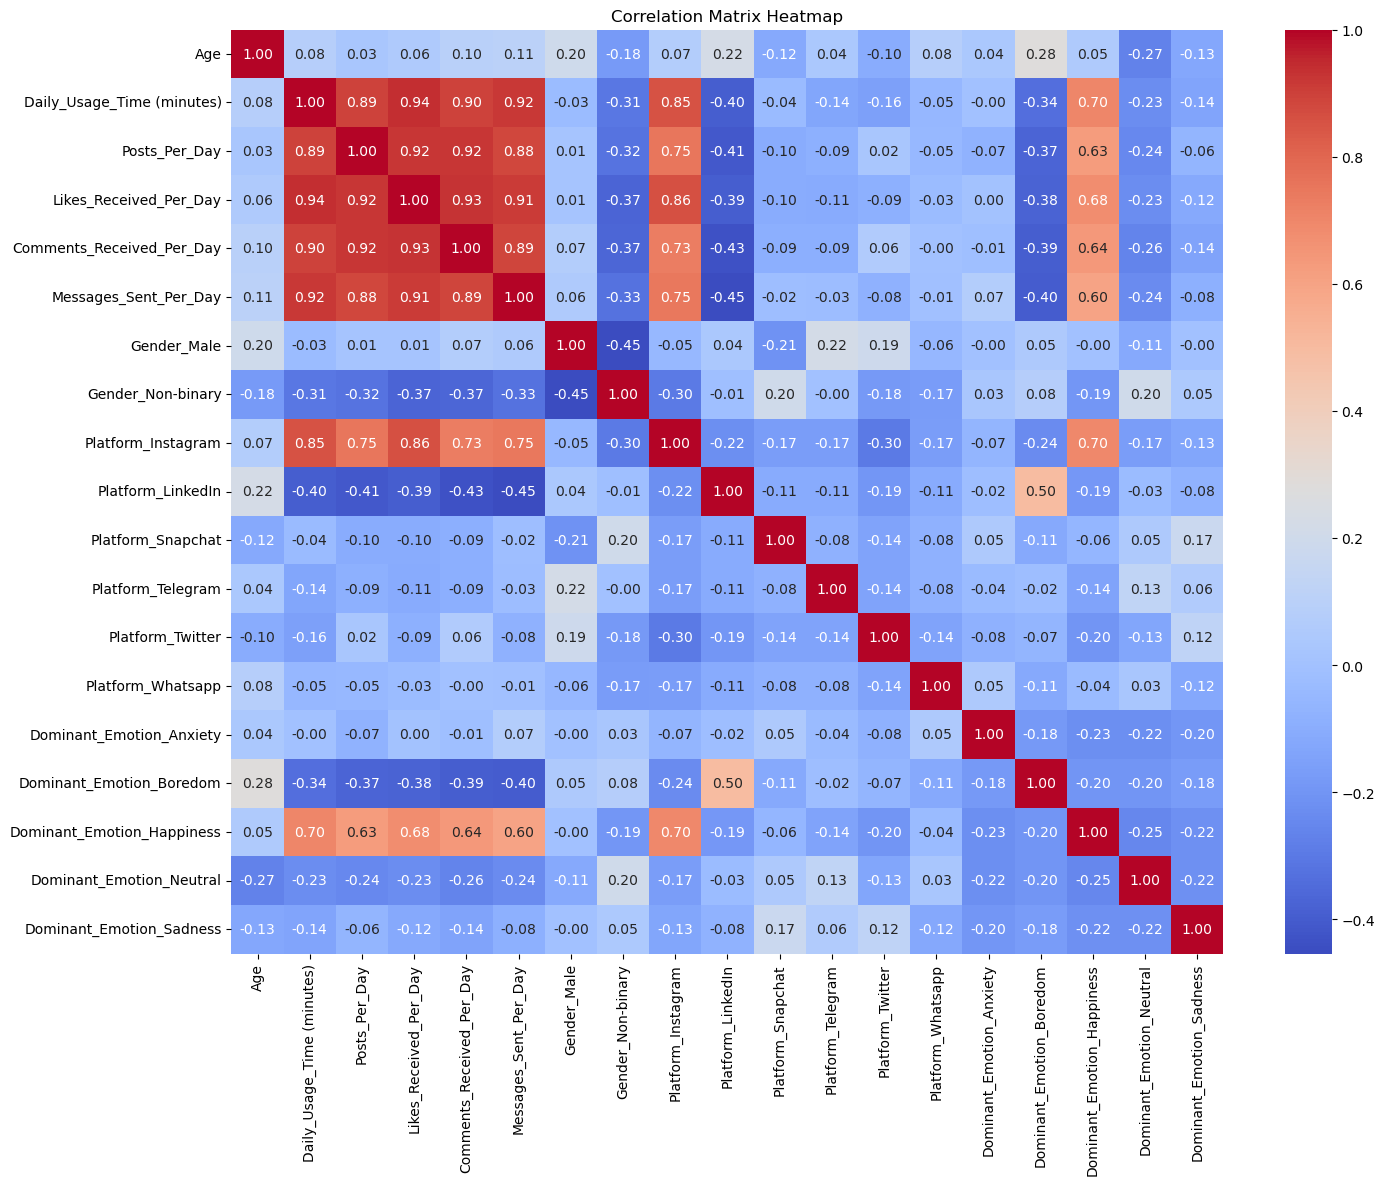

In [46]:
# Convert categorical variables into numerical values for correlation calculation
data_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Platform', 'Dominant_Emotion'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

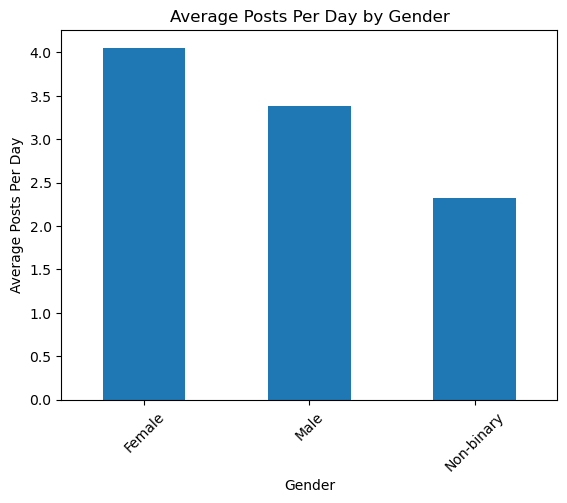

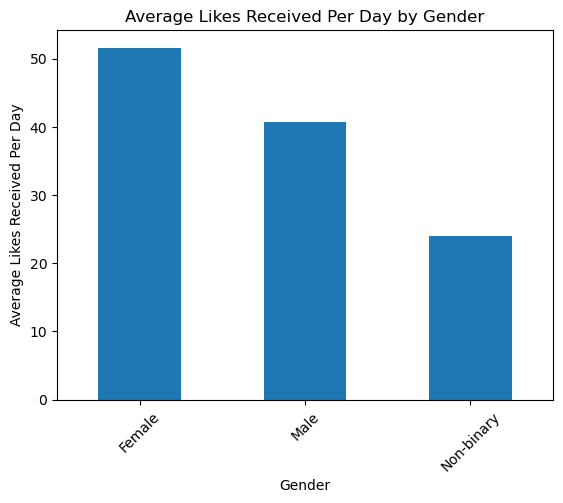

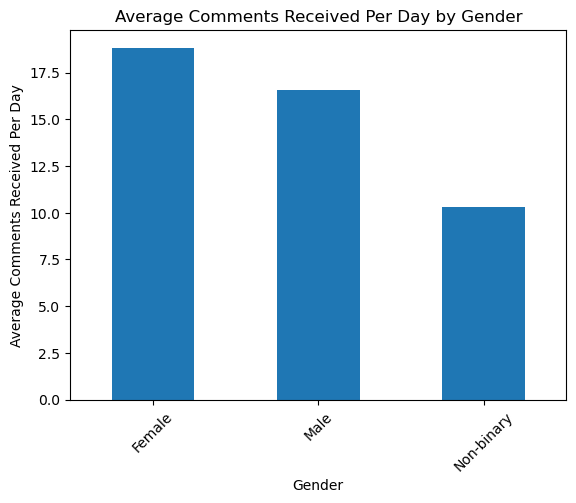

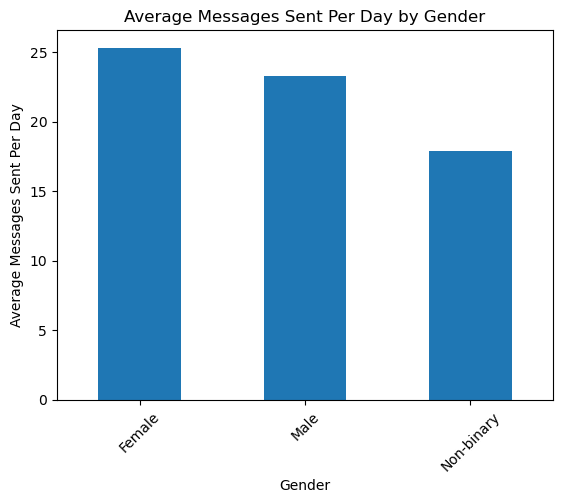

<Figure size 640x480 with 0 Axes>

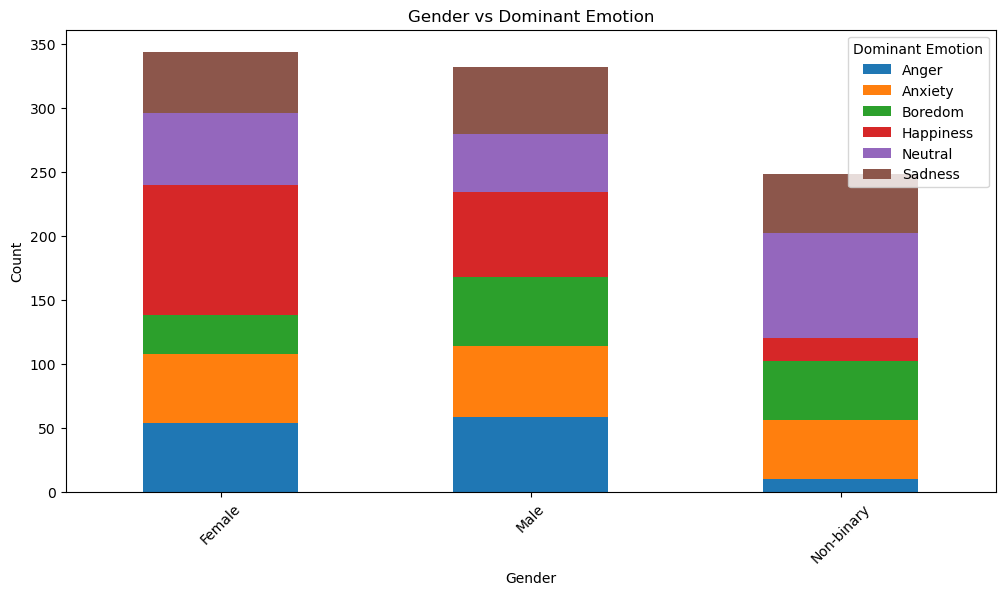

<Figure size 640x480 with 0 Axes>

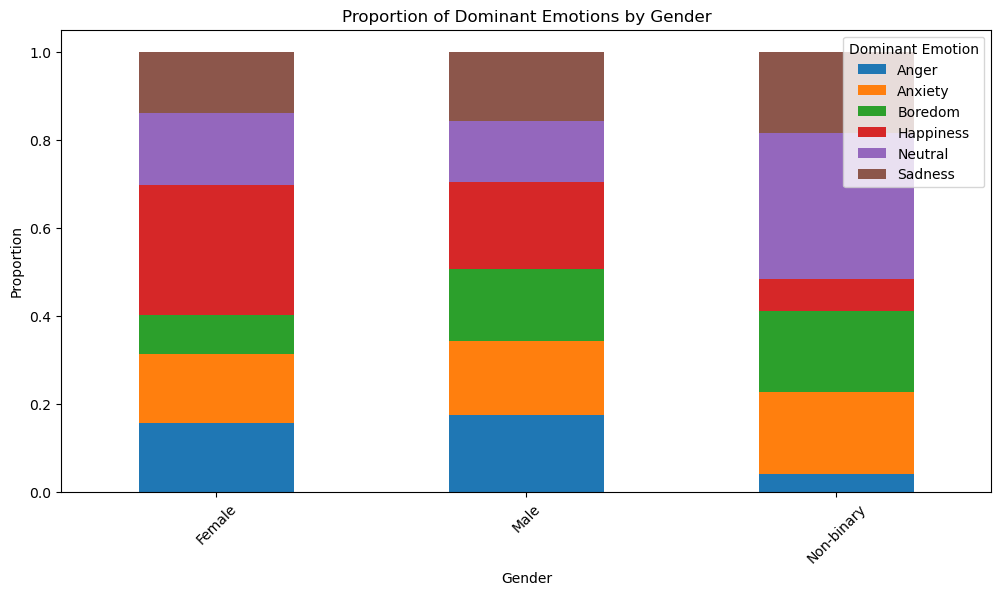

In [48]:
# Plot the Average Number of Posts Per Day by Gender
df_clean.groupby('Gender')['Posts_Per_Day'].mean().plot(kind='bar')
plt.title('Average Posts Per Day by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Posts Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

# Plot the Average Number of Likes Received Per Day by Gender
df_clean.groupby('Gender')['Likes_Received_Per_Day'].mean().plot(kind='bar')
plt.title('Average Likes Received Per Day by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Likes Received Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

# Plot the Average Number of Comments Received Per Day by Gender
df_clean.groupby('Gender')['Comments_Received_Per_Day'].mean().plot(kind='bar')
plt.title('Average Comments Received Per Day by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Comments Received Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

# Plot the Average Number of Messages Sent Per Day by Gender
df_clean.groupby('Gender')['Messages_Sent_Per_Day'].mean().plot(kind='bar')
plt.title('Average Messages Sent Per Day by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Messages Sent Per Day')
plt.xticks(rotation=45)
plt.show()
plt.clf()

# Plot the Distribution of Dominant Emotions by Gender 
df_clean.groupby(['Gender', 'Dominant_Emotion']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender vs Dominant Emotion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dominant Emotion')
plt.show()
plt.clf()

# Calculate the proportions of dominant emotions by gender
proportion_data = df_clean.groupby(['Gender', 'Dominant_Emotion']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plot the proportional distribution of dominant emotions by gender
proportion_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Dominant Emotions by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Dominant Emotion')
plt.show()

## Discussion

1. How does the distribution of dominant emotions vary across different age groups? Are younger users more prone to certain emotions compared to older users?
    * The distribution of dominant emotions varies across different age groups. The youngest age group (20 to 25) experiences the largest proportion of sadness, and lowest proportions of boredom and anxiety. 26 to 30 year olds experience the most anger and anxiety related to social media usage, while 30 to 35 year olds experience the most boredom. Based on this data, it seems that 26 to 30 year olds would benefit from mental health care. 

---

2. Which platform has the highest average daily usage time among users? Is there a significant difference in the emotional well-being of users across different platforms?
    * Instagram has the highest usage time among among users, while LinkedIn has the lowest usage time. The other platforms experience about the same usage time. There is a significant difference in the dominant emotions of users across different platforms. Instagram users report the most happiness by a significant amount, while LinkedIn users report the most boredom. WhatsApp and Twitter users report the most anger, and Snapchat users report the most sadness. 
    
---

3. How do the number of posts, likes, comments, and messages sent per day differ between genders? Are there any notable trends in the dominant emotions experienced by different genders?
    * Across all usage metrics (posts, likes, comments, and messages per day), females interact the most with social media and non-binary people the least. Males and females experience roughly the same amount of anger and anxiety. Females report the most happiness, and males report the most boredom. Despite the smaller sample size of non-binary people, they report nearly the same level of anxiety as males and females, indicating a higher proportion of anxiety among non-binary people. The level of sadness reported by each gender group was approximately the same. 

## Next Steps

This dataset has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:

* Conduct advanced statistical analysis such as ANOVA or chi-square tests to determine the significance of differences in emotions across platforms, age groups, and genders.
* Develop and fine-tune predictive machine learning models to forecast emotional states based on social media usage patterns using algorithms like Random Forest and Gradient Boosting.
* Compare this dataset with other datasets on social media usage and emotional well-being to identify common patterns or unique differences.